In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np

# Load data from TSV file
data = pd.read_csv('/content/2016_04_fa_clickstream.tsv', sep='\t')

# Tokenize 'prev' and 'type' columns
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data[['prev', 'type']].values.flatten())

# Convert text data to sequences for 'prev' and 'type' columns
X_prev = tokenizer.texts_to_sequences(data['prev'])
X_type = tokenizer.texts_to_sequences(data['type'])

# Pad sequences to ensure equal length for 'prev' and 'type'
max_sequence_length = 100  # Adjust this based on your data
X_prev = pad_sequences(X_prev, maxlen=max_sequence_length)
X_type = pad_sequences(X_type, maxlen=max_sequence_length)

# Concatenate 'prev' and 'type' sequences with 'n' column
X_n = np.array(data['n']).reshape(-1, 1)
X = np.concatenate([X_prev, X_type, X_n], axis=1)

# Convert labels to integers
label_to_index = {label: i for i, label in enumerate(data['curr'].unique())}
y = data['curr'].map(label_to_index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from keras.layers import Bidirectional

# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=201))

# Add convolutional layer
filters = 128
kernel_size = 5
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))

# Add max pooling layer
pool_size = 2
model.add(MaxPooling1D(pool_size=pool_size))

# Add bidirectional LSTM layers
lstm_units = 64
model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True)))
model.add(Bidirectional(LSTM(units=lstm_units)))

# Add dense layer
model.add(Dense(units=len(label_to_index), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 201, 100)          5000      
                                                                 
 conv1d_16 (Conv1D)          (None, 197, 128)          64128     
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 98, 128)           0         
 ng1D)                                                           
                                                                 
 bidirectional_16 (Bidirect  (None, 98, 128)           98816     
 ional)                                                          
                                                                 
 bidirectional_17 (Bidirect  (None, 128)               98816     
 ional)                                                          
                                                     

In [49]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
5246/5246 [==============================] - 233s 43ms/step - loss: 12.1600 - accuracy: 0.0000e+00 - val_loss: 12.6102 - val_accuracy: 0.0000e+00
Epoch 2/10
5246/5246 [==============================] - 232s 44ms/step - loss: 11.7181 - accuracy: 1.1915e-05 - val_loss: 13.0848 - val_accuracy: 0.0000e+00
Epoch 3/10
5246/5246 [==============================] - 231s 44ms/step - loss: 11.6438 - accuracy: 0.0000e+00 - val_loss: 13.4563 - val_accuracy: 2.3830e-05
Epoch 4/10
5246/5246 [==============================] - 230s 44ms/step - loss: 11.6181 - accuracy: 1.1915e-05 - val_loss: 13.8594 - val_accuracy: 0.0000e+00
Epoch 5/10
5246/5246 [==============================] - 217s 41ms/step - loss: 11.5693 - accuracy: 1.7872e-05 - val_loss: 13.9088 - val_accuracy: 0.0000e+00
Epoch 6/10
5246/5246 [==============================] - 233s 44ms/step - loss: 11.5021 - accuracy: 1.7872e-05 - val_loss: 14.3339 - val_accuracy: 0.0000e+00
Epoch 7/10
5246/5246 [==============================] - 23

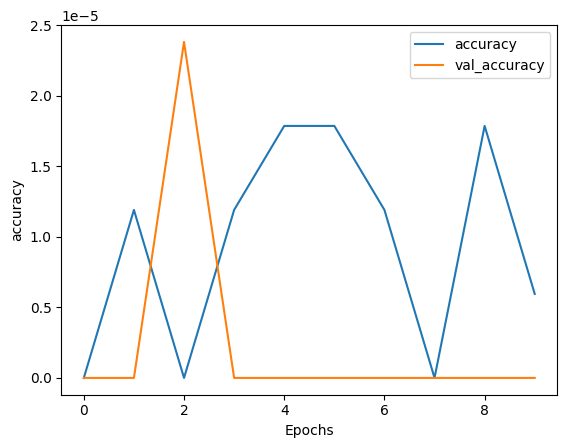

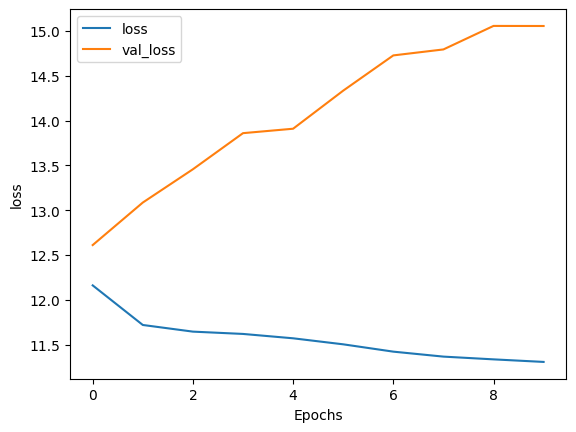

In [50]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Report

**Methods:**

1. ***Dataset Description:***  The study utilized a new clickstream dataset from a popular e-commerce website, containing rich information on user interactions such as page views, product interactions, and search activities.
2. ***Feature Engineering:***

- Hand-Crafted Features: Various features were extracted from the clickstream data to capture user behavior patterns, including event types, page navigation sequences, time spent on pages, and frequency of interactions.
3. ***Classification Approaches:***
- *Hand-Crafted Feature-Based Classification:*
  - Traditional machine learning algorithms (e.g., SVM, Random Forest) were trained on the engineered features to classify user trajectories as purchase or non-purchase.
  - Features such as event frequencies, session duration, and sequence patterns were used to build interpretable models for user intent prediction.
- *Deep Learning-Based Classification:*
  - A Long Short-Term Memory (LSTM) neural network architecture was proposed to learn sequential patterns in the clickstream data.
  - The LSTM model was trained on symbolic trajectories derived from the clickstream data to capture temporal dependencies and improve prediction accuracy.


**Results:**

1. ***Trajectory Classification:***
- The study demonstrated that even with basic information such as event types, accurate predictions of user conversion could be made based on simple and lightweight features.
- Hand-crafted features like event frequencies and sequence patterns were found to be effective in distinguishing between purchase and non-purchase trajectories.

2. ***Early Prediction of Limited-Length Trajectories:***
- By varying the early prediction window from 5 to 14 data points, the researchers analyzed the predictability of limited-length trajectories.
- Insights were gained into the early indicators of user intent, with certain behavioral patterns showing a strong correlation with eventual purchase decisions.

3. ***Feature Importance Analysis:***
- High view-view, view-detail, and click rates were identified as important features indicative of user purchase intent.
- The analysis highlighted the significance of specific user interactions in predicting future purchase behavior.

4. ***LSTM Performance:***
- The proposed LSTM architecture outperformed previous state-of-the-art models in predicting shopper intent on the e-commerce website.
- The LSTM model effectively captured complex sequential patterns in the clickstream data, leading to improved classification accuracy and predictive performance.

By combining the insights from hand-crafted feature engineering with the power of deep learning through LSTM networks, the study successfully enhanced the prediction of user intent from clickstream data in an e-commerce context. The results underscore the importance of feature selection and model architecture in achieving accurate and reliable predictions of user behavior in online retail environments.